CÁLCULO ASTRONÔMICO: TERRA-LUA NO PERIGEU
Distância no perigeu (Lua mais próxima): 363,300 km
Diâmetro equatorial da Terra: 12,756 km
------------------------------------------------------------
RESULTADO: Na distância do perigeu, cabem aproximadamente
28.5 Terras alinhadas uma atrás da outra.


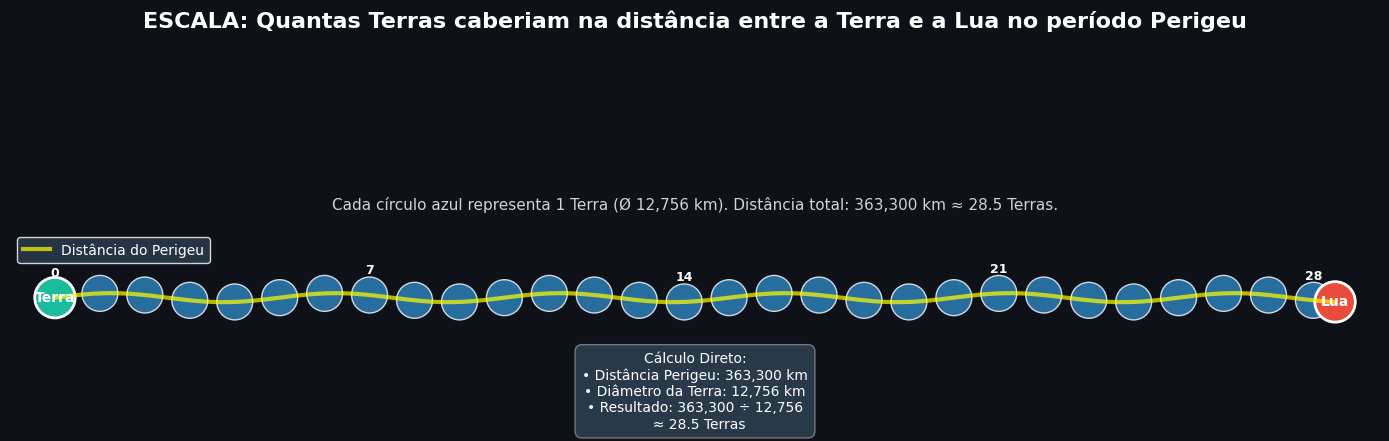

In [ ]:
# -*- coding: utf-8 -*-
"""
Cálculo e visualização: Quantas Terras cabem na distância Terra-Lua no perigeu.
Autor: Assistente
Data: 2026-01-05
"""

# 1. IMPORTAÇÃO DE BIBLIOTECAS
import matplotlib.pyplot as plt
import numpy as np

# 2. DEFINIÇÃO DAS CONSTANTES (em quilômetros)
DISTANCIA_PERIGEU = 363_300  # Distância Terra-Lua no ponto mais próximo[citation:1]
DIAMETRO_TERRA_EQUATORIAL = 12_756  # Diâmetro da Terra na linha do equador[citation:1]

# 3. CÁLCULO PRINCIPAL
def calcular_terras_no_espaco(distancia, diametro):
    """
    Calcula quantas esferas (Terras) cabem em linha reta em uma dada distância.

    Parâmetros:
        distancia (float): A distância total disponível (ex: perigeu).
        diametro (float): O diâmetro de uma esfera individual (ex: Terra).

    Retorna:
        float: Número de esferas que cabem no espaço.
    """
    return distancia / diametro

# Executa o cálculo
numero_de_terras = calcular_terras_no_espaco(DISTANCIA_PERIGEU, DIAMETRO_TERRA_EQUATORIAL)

# 4. APRESENTAÇÃO DOS RESULTADOS NO CONSOLE
print("="*60)
print("CÁLCULO ASTRONÔMICO: TERRA-LUA NO PERIGEU")
print("="*60)
print(f"Distância no perigeu (Lua mais próxima): {DISTANCIA_PERIGEU:,.0f} km")
print(f"Diâmetro equatorial da Terra: {DIAMETRO_TERRA_EQUATORIAL:,.0f} km")
print("-"*60)
print(f"RESULTADO: Na distância do perigeu, cabem aproximadamente")
print(f"{numero_de_terras:.1f} Terras alinhadas uma atrás da outra.")
print("="*60)

# 5. CRIAÇÃO DO GRÁFICO ILUSTRATIVO
def criar_grafico_escala(distancia_km, diametro_km, terras_cabem):
    """
    Gera uma visualização que compara a distância ao tamanho da Terra.

    Parâmetros:
        distancia_km (float): Distância total a ser representada.
        diametro_km (float): Diâmetro da Terra como unidade.
        terras_cabem (float): Número de Terras que cabem na distância.
    """
    # Configuração geral do gráfico para melhor visualização em tela cheia
    plt.figure(figsize=(14, 6), facecolor='#0E1117')  # Fundo escuro para contraste
    ax = plt.gca()
    ax.set_facecolor('#0E1117')

    # Para a visualização, 'comprimimos' a escala.
    # 1 unidade no gráfico = 1 diâmetro da Terra.
    unidades_terra = distancia_km / diametro_km

    # Dados para o gráfico principal: uma linha representando a distância
    x = np.linspace(0, unidades_terra, 500)
    # Usamos uma função seno para dar um efeito de "trilha" ou "órbita" à linha
    y = 0.1 * np.sin(x * 2 * np.pi / 5)  # Onda suave para visualização

    # Plot da linha de distância (em amarelo, representando o espaço)
    ax.plot(x, y, color='yellow', linewidth=3, alpha=0.7, label='Distância do Perigeu')

    # Marcações: Onde cada Terra "cabe" ao longo da linha
    posicoes_terras = np.arange(0, int(terras_cabem) + 1)  # Posições inteiras
    for pos in posicoes_terras:
        # Desenha um círculo azul representando a Terra em cada posição
        circulo = plt.Circle((pos, 0.1 * np.sin(pos * 2 * np.pi / 5)),
                             radius=0.4, color='#2E86C1', alpha=0.8, ec='white')
        ax.add_patch(circulo)
        # Adiciona um rótulo de número sobre a primeira, a última e algumas Terras
        if pos in [0, int(terras_cabem)] or pos % 7 == 0:
            ax.text(pos, 0.1 * np.sin(pos * 2 * np.pi / 5) + 0.55,
                    f"{pos}", ha='center', va='center',
                    color='white', fontweight='bold', fontsize=9)

    # Destaca a primeira e a última Terra com cores diferentes
    circulo_inicio = plt.Circle((0, 0), radius=0.45, color='#1ABC9C', alpha=1, ec='white', linewidth=2)
    circulo_fim = plt.Circle((terras_cabem, 0.1 * np.sin(terras_cabem * 2 * np.pi / 5)),
                             radius=0.45, color='#E74C3C', alpha=1, ec='white', linewidth=2)
    ax.add_patch(circulo_inicio)
    ax.add_patch(circulo_fim)
    ax.text(0, 0, "Terra", ha='center', va='center', color='white', fontweight='bold')
    ax.text(terras_cabem, 0.1 * np.sin(terras_cabem * 2 * np.pi / 5),
            "Lua", ha='center', va='center', color='white', fontweight='bold')

    # Configurações dos eixos e layout
    ax.set_xlim(-1, unidades_terra + 1)
    ax.set_ylim(-1.5, 1.5)
    ax.set_aspect('equal')
    ax.axis('off')  # Remove os eixos numéricos para um visual mais limpo

    # Títulos e legendas explicativas
    plt.suptitle('ESCALA: Quantas Terras caberiam na distância entre a Terra e a Lua no período Perigeu',
                 fontsize=16, color='white', fontweight='bold', y=0.95)
    plt.title(f'Cada círculo azul representa 1 Terra (Ø {diametro_km:,} km). '
              f'Distância total: {distancia_km:,} km ≈ {terras_cabem:.1f} Terras.',
              fontsize=11, color='lightgray', pad=15)

    # Caixa de texto com o cálculo
    texto_info = (f'Cálculo Direto:\n'
                  f'• Distância Perigeu: {distancia_km:,} km\n'
                  f'• Diâmetro da Terra: {diametro_km:,} km\n'
                  f'• Resultado: {distancia_km:,} ÷ {diametro_km:,}\n'
                  f'  ≈ {terras_cabem:.1f} Terras')
    ax.text(unidades_terra/2, -1.2, texto_info, ha='center', va='top',
            color='white', fontsize=10,
            bbox=dict(boxstyle="round,pad=0.5", facecolor='#2C3E50', alpha=0.9, edgecolor='gray'))

    # Legenda
    ax.legend(loc='upper left', facecolor='#2C3E50', edgecolor='white', labelcolor='white')

    # Ajuste de layout e exibição
    plt.tight_layout()
    plt.show()

# 6. EXECUÇÃO DA FUNÇÃO QUE CRIA O GRÁFICO
if __name__ == "__main__":
    criar_grafico_escala(DISTANCIA_PERIGEU, DIAMETRO_TERRA_EQUATORIAL, numero_de_terras)